In [2]:
#import library and helper models
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2

In [5]:
# load dataset
dataset=pd.read_csv('diabetes.csv')
# print the dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
for x in columns:
    #Convert zero values to the mean
    dataset[x]=dataset[x].replace(to_replace=({0:dataset[x].mean()}))


In [35]:
#save dataset after cleaning 
Dataset2=dataset.to_csv(r'dataset2.csv')
diabetes=pd.read_csv('Dataset2.csv')
# print the new dataset
diabetes.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [44]:
array = diabetes.values
#Split dataset
#Sample vectors
X = array[:,1:9]
# Target vector (class labels)
y = array[:,9]
# Print the shape of the array
X.shape, y.shape

((768, 8), (768,))

In [45]:
# chi2(score function for classification)
chi = chi2(X,y)
#probability value
#chi[1]:p-values of each feature
p_values = pd.Series(chi[1],index = diabetes.columns[1:9])
#Sort the values in ascending order
p_values.sort_values(ascending = True , inplace = True)
print(p_values)

Insulin                      0.000000e+00
Glucose                     1.851196e-310
Age                          2.516388e-41
BMI                          1.674535e-25
Pregnancies                  1.527793e-22
SkinThickness                1.418787e-19
BloodPressure                1.243964e-10
DiabetesPedigreeFunction     2.022137e-02
dtype: float64


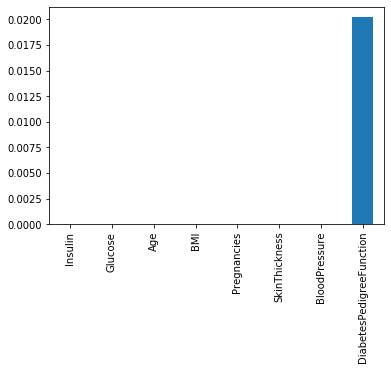

In [47]:
p_values.plot.bar()

Since "DiabetesPedigreeFunction" has higher the p-value, it says that this variables is independent of the response and can not be considered for model training